The following snippets show the differences in depth-first, breadth-first, and A* search with an example on a grid board

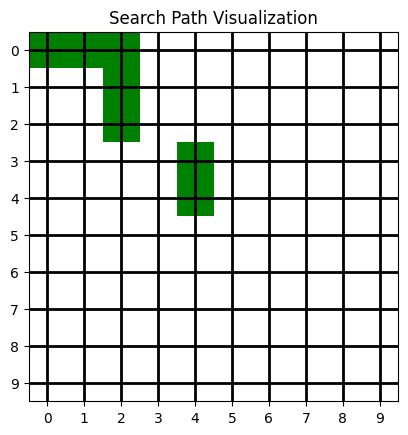

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_search(board_size, path):
    # Create a board initialized with zeros
    board = np.zeros(board_size)

    # Mark the path on the board
    for point in path:
        board[point] = 1

    # Create a color map for visualization
    cmap = mcolors.ListedColormap(['white', 'green'])
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Plot the board
    # plt.figure(figsize=(5, 5))
    plt.imshow(board, cmap=cmap, norm=norm)
    plt.grid(which='major', color='black', linestyle='-', linewidth=2)
    plt.xticks(range(board_size[1]))
    plt.yticks(range(board_size[0]))
    plt.title("Search Path Visualization")
    plt.show()

# Example usage
board_size = (10, 10)  # 10x10 board
path = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2),(3,4),(4,4),(3,3)]  # Example path
visualize_search(board_size, path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# the depth first search function dfs()
def dfs(board, start, end, path=[]):
    path = path + [start]

    if start == end:
        return path

    # Directions: Up, Right, Down, Left
    directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

    for direction in directions:
        next_node = (start[0] + direction[0], start[1] + direction[1])

        # Check if the next node is within the board boundaries and not yet visited
        if 0 <= next_node[0] < len(board) and 0 <= next_node[1] < len(board[0]) and board[next_node[0]][next_node[1]] == 0:
            new_path = dfs(board, next_node, end, path)
            if new_path:
                return new_path

    return None

def visualize_search(board_size, path):
    board = np.zeros(board_size)

    for point in path:
        board[point] = 1

    cmap = mcolors.ListedColormap(['white', 'green'])
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # plt.figure(figsize=(5, 5))
    plt.imshow(board, cmap=cmap, norm=norm)
    plt.grid(which='major', color='black', linestyle='-', linewidth=2)
    plt.xticks(range(board_size[1]))
    plt.yticks(range(board_size[0]))
    plt.title("DFS Path Visualization")
    plt.show()

# Example usage
board_size = (4, 6)
start = (4, 2)
end = (4, 3)
path = dfs(np.zeros(board_size), start, end)

if path:
    visualize_search(board_size, path)
else:
    print("No path found.")

In [ ]:
import sys
print(sys.getrecursionlimit())

3000


A recursive implementation of DFS can lead to a recursion error, especially for larger grids or more complex paths. 
See the output of the recursion limit function above
This happens because Python has a limit on the maximum recursion depth to prevent a stack overflow. To avoid this issue, let's implement an iterative version of DFS using a stack, which is more efficient and avoids the recursion limit problem. Here's the modified code:

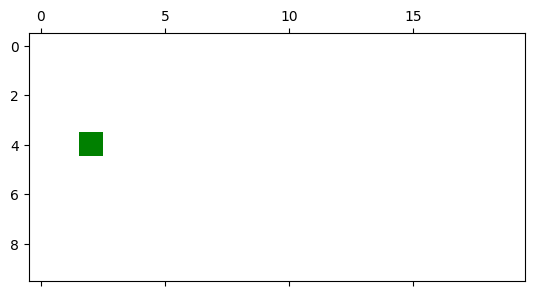

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation

# the depth first search function dfs()
def dfs_iterative(board, start, end):
    stack = [start]
    path = []
    visited = set()

    while stack:
        current = stack.pop()
        if current in visited:
            continue
        visited.add(current)
        path.append(current)

        if current == end:
            return path

        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:  # Right, Down, Left, Up
            next_node = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= next_node[0] < board.shape[0] and 0 <= next_node[1] < board.shape[1]:
                stack.append(next_node)

    return None

def update(frame):
    global board
    if frame < len(path):
        board[path[frame]] = 1
    mat.set_data(board)
    return [mat]

# Example usage
board_size = (10, 20)
start = (4, 2)
end = (7, 16)
path = dfs_iterative(np.zeros(board_size), start, end)

if path:
    board = np.zeros(board_size)
    cmap = mcolors.ListedColormap(['white', 'green'])
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    mat = ax.matshow(board, cmap=cmap, norm=norm)
    ani = FuncAnimation(fig, update, frames=len(path), blit=True, interval=300)
    # plt.show()
else:
    print("No path found.")


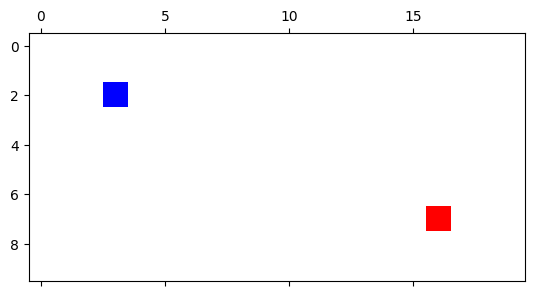

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation

# the depth first search function with a stack dfs_iterative()
def dfs_iterative(board, start, end):
    stack = [start]
    path = []
    visited = set()

    while stack:
        current = stack.pop()
        if current in visited:
            continue
        visited.add(current)
        path.append(current)

        if current == end:
            return path

        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:  # Right, Down, Left, Up
            next_node = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= next_node[0] < board.shape[0] and 0 <= next_node[1] < board.shape[1]:
                stack.append(next_node)

    return None

def update(frame):
    global board
    if frame < len(path) and path[frame] != start and path[frame] != end:
        board[path[frame]] = 2  # Marking the path
    mat.set_data(board)
    return [mat]

# Example usage
board_size = (10, 20)
start = (2, 3)
end = (7, 16)
path = dfs_iterative(np.zeros(board_size), start, end)

if path:
    board = np.zeros(board_size)
    board[start] = 1  # Marking the start position
    board[end] = 3    # Marking the end position

    # Create a custom colormap
    cmap = mcolors.ListedColormap(['white', 'blue', 'green', 'red'])  # White: Empty, Blue: Start, Green: Path, Red: End
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    mat = ax.matshow(board, cmap=cmap, norm=norm)
    ani = FuncAnimation(fig, update, frames=len(path), blit=True, interval=300)
    # plt.show()
else:
    print("No path found.")
    
# To animate the plot in a notebook we need the following
from IPython.display import HTML
HTML(ani.to_jshtml())

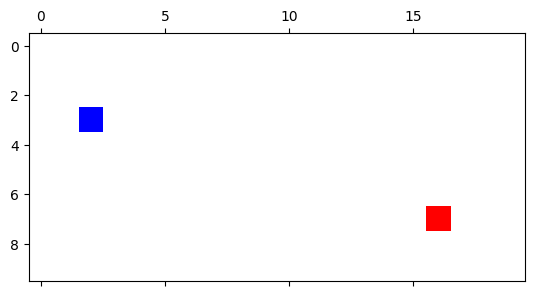

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from collections import deque

# the breadth first search function bfs()
def bfs(board, start, end):
    queue = deque([start])
    path = []
    visited = set()
    prev = {start: None}  # To reconstruct the path

    while queue:
        current = queue.popleft()
        if current in visited:
            continue
        visited.add(current)

        if current == end:
            break

        for direction in [(1, 0), (-1, 0), (0, -1),(0, 1) ]:  # Down, Up, Left, Right
            next_node = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= next_node[0] < board.shape[0] and 0 <= next_node[1] < board.shape[1] and next_node not in visited:
                queue.append(next_node)
                prev[next_node] = current

    # Reconstruct the path from end to start
    current = end
    while current is not None:
        path.append(current)
        current = prev[current]
    return path[::-1]

def update(frame):
    global board
    if frame < len(path) and path[frame] != start and path[frame] != end:
        board[path[frame]] = 2  # Marking the path
    mat.set_data(board)
    return [mat]

# Example usage
board_size = (10, 20)
start = (3, 2)
end = (7, 16)
path = bfs(np.zeros(board_size), start, end)

if path:
    board = np.zeros(board_size)
    board[start] = 1  # Marking the start position
    board[end] = 3    # Marking the end position

    cmap = mcolors.ListedColormap(['white', 'blue', 'green', 'red'])
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    mat = ax.matshow(board, cmap=cmap, norm=norm)
    ani = FuncAnimation(fig, update, frames=len(path), blit=True, interval=300)
    # plt.show()
else:
    print("No path found.")

from IPython.display import HTML
HTML(ani.to_jshtml())

To create a BFS search with random obstacles on the board, we'll need to modify the setup of the board and the BFS algorithm to account for these obstacles. I'll adjust the code to place random blocks on the board, which the BFS algorithm will have to navigate around.

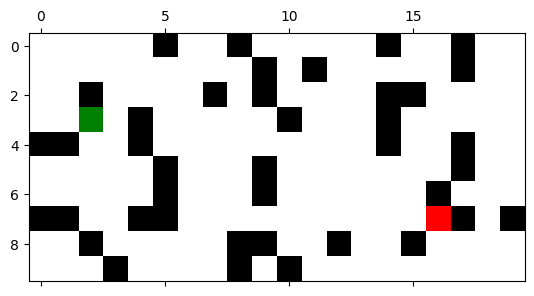

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from collections import deque
import random

def create_board_with_obstacles(board_size, start, end, obstacle_ratio=0.2):
    board = np.zeros(board_size)
    obstacle_count = int(board_size[0] * board_size[1] * obstacle_ratio)

    while obstacle_count > 0:
        obstacle_pos = (random.randint(0, board_size[0] - 1), random.randint(0, board_size[1] - 1))
        if obstacle_pos != start and obstacle_pos != end and board[obstacle_pos] == 0:
            board[obstacle_pos] = -1  # Marking the obstacle
            obstacle_count -= 1

    return board

def bfs(board, start, end):
    queue = deque([start])
    path = []
    visited = set()
    prev = {start: None}

    while queue:
        current = queue.popleft()
        if current in visited:
            continue
        visited.add(current)

        if current == end:
            break

        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            next_node = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= next_node[0] < board.shape[0] and 0 <= next_node[1] < board.shape[1] and board[next_node] != -1 and next_node not in visited:
                queue.append(next_node)
                prev[next_node] = current

    current = end
    while current is not None:
        path.append(current)
        current = prev[current]
    return path[::-1]

def update(frame):
    global board
    if frame < len(path) and path[frame] != start and path[frame] != end:
        board[path[frame]] = 2
    mat.set_data(board)
    return [mat]

# Example usage
board_size = (10, 20)
start = (3, 2)
end = (7,16)
board = create_board_with_obstacles(board_size, start, end, obstacle_ratio=0.2)
path = bfs(board, start, end)

if path:
    board[start] = 1
    board[end] = 3

    cmap = mcolors.ListedColormap(['black', 'white', 'green', 'blue' ,'red'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    mat = ax.matshow(board, cmap=cmap, norm=norm)
    ani = FuncAnimation(fig, update, frames=len(path), blit=True, interval=300)
    # plt.show()
else:
    print("No path found.")
from IPython.display import HTML
HTML(ani.to_jshtml())

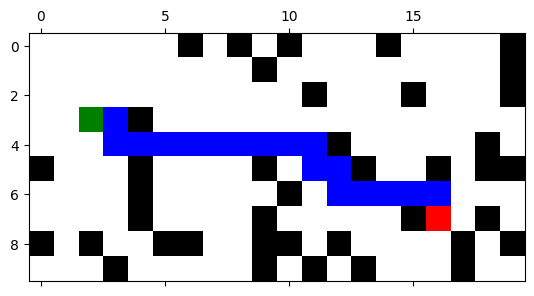

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
import random
import heapq

def create_board_with_obstacles(board_size, start, end, obstacle_ratio=0.2):
    board = np.zeros(board_size)
    obstacle_count = int(board_size[0] * board_size[1] * obstacle_ratio)

    while obstacle_count > 0:
        obstacle_pos = (random.randint(0, board_size[0] - 1), random.randint(0, board_size[1] - 1))
        if obstacle_pos != start and obstacle_pos != end and board[obstacle_pos] == 0:
            board[obstacle_pos] = -1
            obstacle_count -= 1

    return board

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(board, start, end):
    priority_queue = []
    heapq.heappush(priority_queue, (0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}
    path = []

    while priority_queue:
        current_cost, current = heapq.heappop(priority_queue)

        if current == end:
            break

        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            next_node = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= next_node[0] < board.shape[0] and 0 <= next_node[1] < board.shape[1] and board[next_node] != -1:
                new_cost = cost_so_far[current] + 1  # Assuming cost of 1 for each move
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    priority = new_cost + heuristic(end, next_node)
                    heapq.heappush(priority_queue, (priority, next_node))
                    came_from[next_node] = current

    current = end
    while current is not None:
        path.append(current)
        current = came_from[current]
    return path[::-1]

def update(frame):
    global board
    if frame < len(path) and path[frame] != start and path[frame] != end:
        board[path[frame]] = 2
    mat.set_data(board)
    return [mat]

# Example usage
board_size = (10, 20)
start = (3, 2)
end = (7,16)
board = create_board_with_obstacles(board_size, start, end, obstacle_ratio=0.2)
path = a_star_search(board, start, end)

if path:
    board[start] = 1
    board[end] = 3

    cmap = mcolors.ListedColormap(['black', 'white', 'green', 'blue' ,'red'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    mat = ax.matshow(board, cmap=cmap, norm=norm)
    ani = FuncAnimation(fig, update, frames=len(path), blit=True, interval=300)
    # plt.show()
else:
    print("No path found.")

from IPython.display import HTML
HTML(ani.to_jshtml())

The appearance of the BFS and DFS algorithms moving in one direction and not exploring all surrounding nodes is likely due to the way the neighboring nodes are queued or stacked for exploration. In both the BFS and DFS implementations provided earlier, the order in which neighboring nodes are added to the queue (for BFS) or stack (for DFS) can significantly influence the exploration pattern.

Here's a breakdown of why this might happen:

Order of Neighboring Nodes:
In the implementations, the order of the directions (Right, Down, Left, Up) determines which neighboring nodes are considered first. If the end node is in a direction that gets queued or stacked early according to this order, the algorithm will seem to move predominantly in that direction.

Nature of BFS and DFS:
BFS: It explores level by level. If the end node is on a direct path from the start node and in a direction prioritized by the order of neighbors, BFS will reach it without exploring much of the other space.
DFS: It goes as deep as possible in one direction before backtracking. If the end node happens to be along this deep path, DFS will not explore other directions until it either finds the end node or reaches a dead end.

Specific Start and End Positions:
The start and end positions chosen for the pathfinding also affect the exploration pattern. If they are aligned in a way that matches the prioritized exploration direction, the algorithms will seem to move straight towards the goal.

Lack of Obstacles:
In the initial BFS and DFS examples, there were no obstacles. In a clear path scenario, both algorithms will find a relatively direct path to the goal, especially if the goal is along the prioritized exploration direction.

To make the exploration appear more comprehensive, you can:

Change the order in which neighboring nodes are added to the queue or stack.
Introduce obstacles, which force the algorithms to explore alternative routes.
Choose start and end positions that are not aligned in a straight path according to the order of exploration.
Remember, BFS is guaranteed to find the shortest path in an unweighted grid, while DFS is not. The choice of algorithm should depend on the specific requirements of the pathfinding problem you are solving.